In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests 
import seaborn as sns 
from sklearn.model_selection import train_test_split
import re

In [3]:
from IPython.core.display import display, HTML

### WEB SCRAPING

In [4]:
years = range(2019, 2021)
months = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']
headers = ["Rank","Release (Movie Title)","Gross","Theaters","Total Gross","Release Date","Distributor","Months","Years"]
urls = []
url1 = []
tr_fill_rows = []
movie_data = []
"""
This function creates a list of movie entries called 'urls' for the years 2019-2020, and for every month of each year.
Taken from BoxOfficeMojo. I will make this list of urls and store it into a dataframe.
"""
for year in years:
    for month in months:
        url1= f'https://www.boxofficemojo.com/month/{month}/{year}/?grossesOption=calendarGrosses'
        request = requests.get(url1)
        page = request.text
        soup = BeautifulSoup(page, "lxml")
        urls.extend([a.find('a').get('href') for a in soup.find(id='table').find_all(class_ = 'mojo-field-type-release')[1:]])
        request = requests.get(url1)
        soup = BeautifulSoup(page,"html.parser")
        title_string = soup.find('title').text
        title = title_string.split('-')[0].strip()
        title
        table = soup.table
        tr = table.tr
        tr = tr.contents
        tr = table.find_all('tr')[::]
        rows = len(table.find_all('tr')[::]);
        with_out_header = rows-1
        for tr in tr[-with_out_header:]:
            year_tag = soup.new_tag("td", **{'class':'year'})
            year_tag.string = f'{year}'
            month_tag = soup.new_tag("td", **{'class':'month'})
            month_tag.string = f'{month}'
            tr.append(month_tag)
            tr.append(year_tag)
            movie_dict = dict(zip(headers,[(td.contents[0]) for td in tr if td['class'][-1:][0] != 'hidden']))
            movie_data.append(movie_dict)
movie_list_df = pd.DataFrame(movie_data)


In [5]:
len(movie_list_df)

3191

In [ ]:
#CSV file of scraped data
movie_list_df.to_csv('Scraped_data.csv', index = False, header=False)

In [6]:
#Drop these columns 
movie_list_df=movie_list_df.drop(columns=['Rank','Release (Movie Title)','Distributor','Release Date'])

In [ ]:
#Take the gross and convert the values from strings to numerals
length_movie_list=len(movie_list_df['Gross'])
for x in range(0,length_movie_list):
    temp=movie_list_df['Gross'].iloc[x]
    res = ''.join([i for i in temp if i.isdigit()]) 
    movie_list_df['Gross'].iloc[x]=float(res)

## VISUALIZATIONS

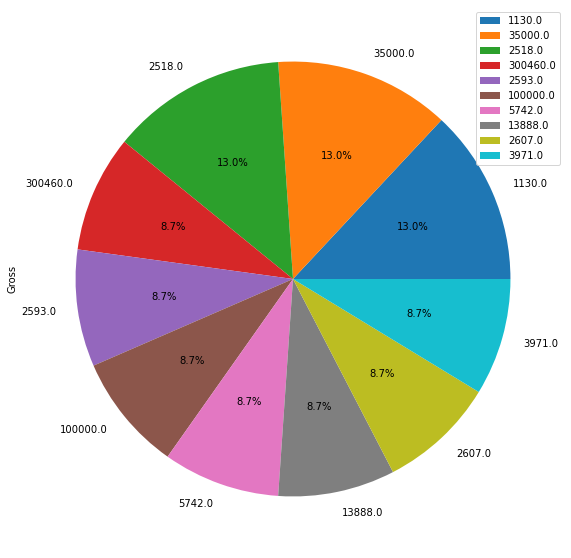

In [9]:
#LETS UNDERSTAND WHAT DATA IS DOING MORE CLEARLY- 
#I know pie charts are not ideal...just looking

#Create pie chart of the top 10 values of Gross for Movies
movie_list_df["Gross"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10)).legend()

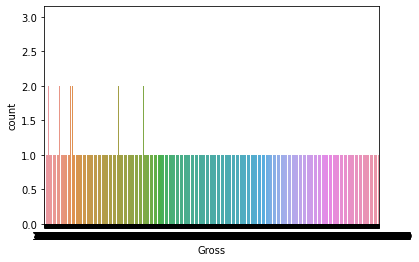

In [10]:
#Display the number of movies that have Gross with a certain value
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x ="Gross",data = movie_list_df)

In [ ]:
#Take the total gross and convert value from strings to numerals
length_movie_list=len(movie_list_df['Total Gross'])
for x in range(0,length_movie_list):
    temp=movie_list_df['Total Gross'].iloc[x]
    res = ''.join([i for i in temp if i.isdigit()]) 
    movie_list_df['Total Gross'].iloc[x]=float(res)

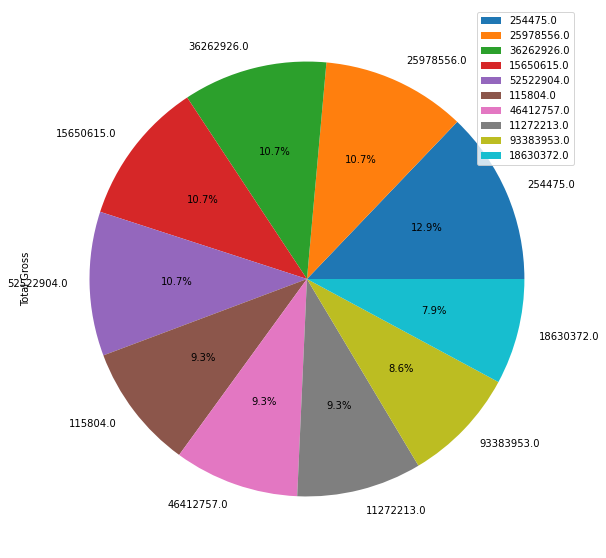

In [13]:
#Create a pie chart of the top 10 values of Total Gross for Movies
movie_list_df["Total Gross"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10)).legend()

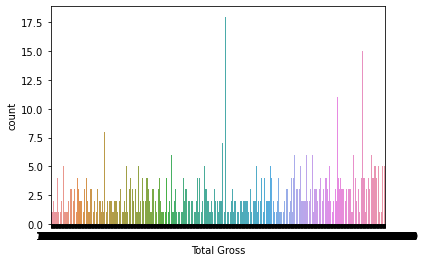

In [14]:
#Display the number of movies that have Total Gross with a certain value
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x ="Total Gross",data = movie_list_df)

In [ ]:
#Take the number of Theaters and convert the values from strings to numerals 
length_movie_list=len(movie_list_df['Theaters'])
for x in range(0,length_movie_list):
    temp1=movie_list_df['Theaters'].iloc[x]
    res = ''.join([i for i in temp1 if i.isdigit()]) 
    if(temp1=='-'):
        res=0
    movie_list_df['Theaters'].iloc[x]=float(res)

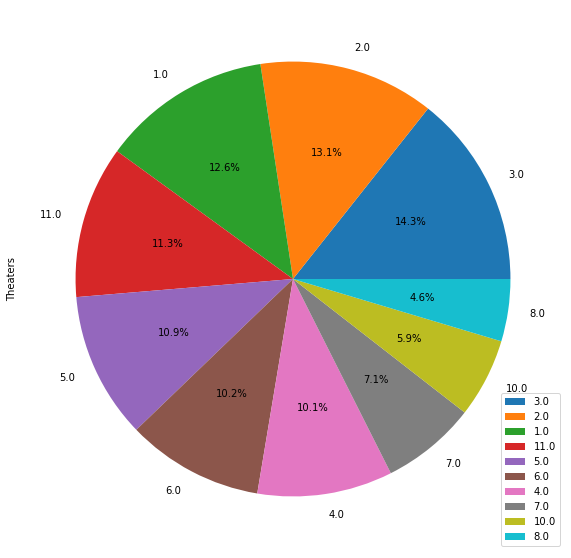

In [17]:
#Create a pie chart of the top 10 Theater values for Movies
movie_list_df["Theaters"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10)).legend()

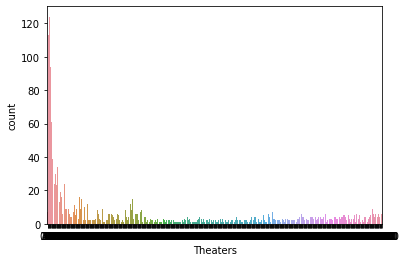

In [18]:
#Display the number of movies that have a Total Gross with a certain value
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x ="Theaters",data = movie_list_df)

## FEATURE ENGINEERING

0


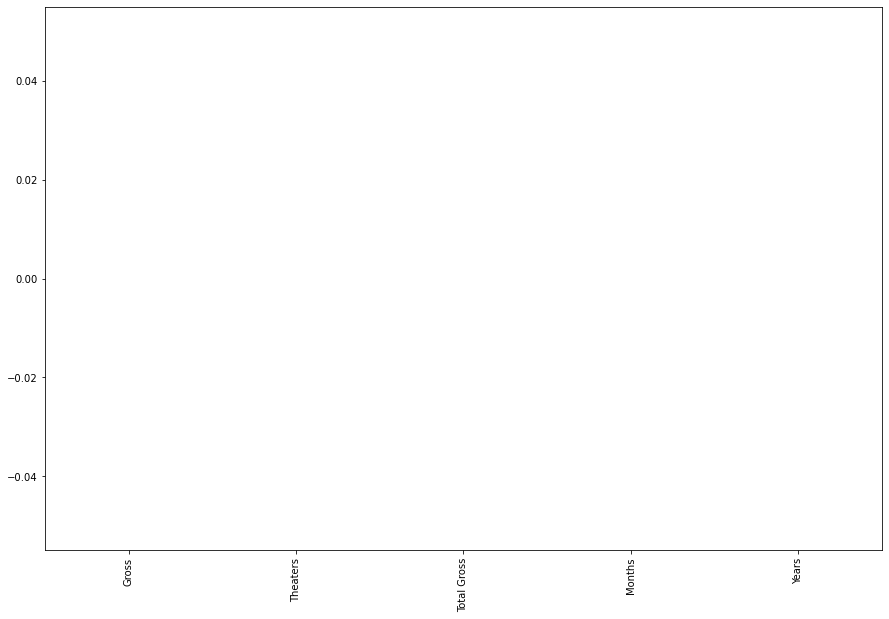

In [19]:
#Check to see if there are any missing data values, luckily there are none
print(np.sum(movie_list_df.isnull().any(axis=1)))
missing_cols = movie_list_df.isnull().sum()
missing_cols.plot.bar(figsize=(15,10))
plt.show()

In [20]:
print(movie_list_df)

            Gross Theaters  Total Gross    Months Years
0     1.19682e+08     4184  3.35062e+08   january  2019
1     7.91201e+07     3844  1.11048e+08   january  2019
2     6.67401e+07     3568  1.08253e+08   january  2019
3     6.27296e+07     3813  1.90241e+08   january  2019
4     6.03514e+07     4090  1.71958e+08   january  2019
...           ...      ...          ...       ...   ...
3186          930        1         5042  december  2020
3187          842     1683  1.34929e+06  december  2020
3188          807       38        20211  december  2020
3189          517        1         1823  december  2020
3190          332       11       254475  december  2020

[3191 rows x 5 columns]


In [21]:
#Make dummy variables
df_dummied = pd.get_dummies(movie_list_df,columns=['Months','Years'])

In [ ]:
print(df_dummied)

In [22]:
#Split the dependent and independent variables
y=df_dummied['Total Gross']
X=df_dummied.drop(columns=['Total Gross'])

## FEATURE DISTRIBUTIONS

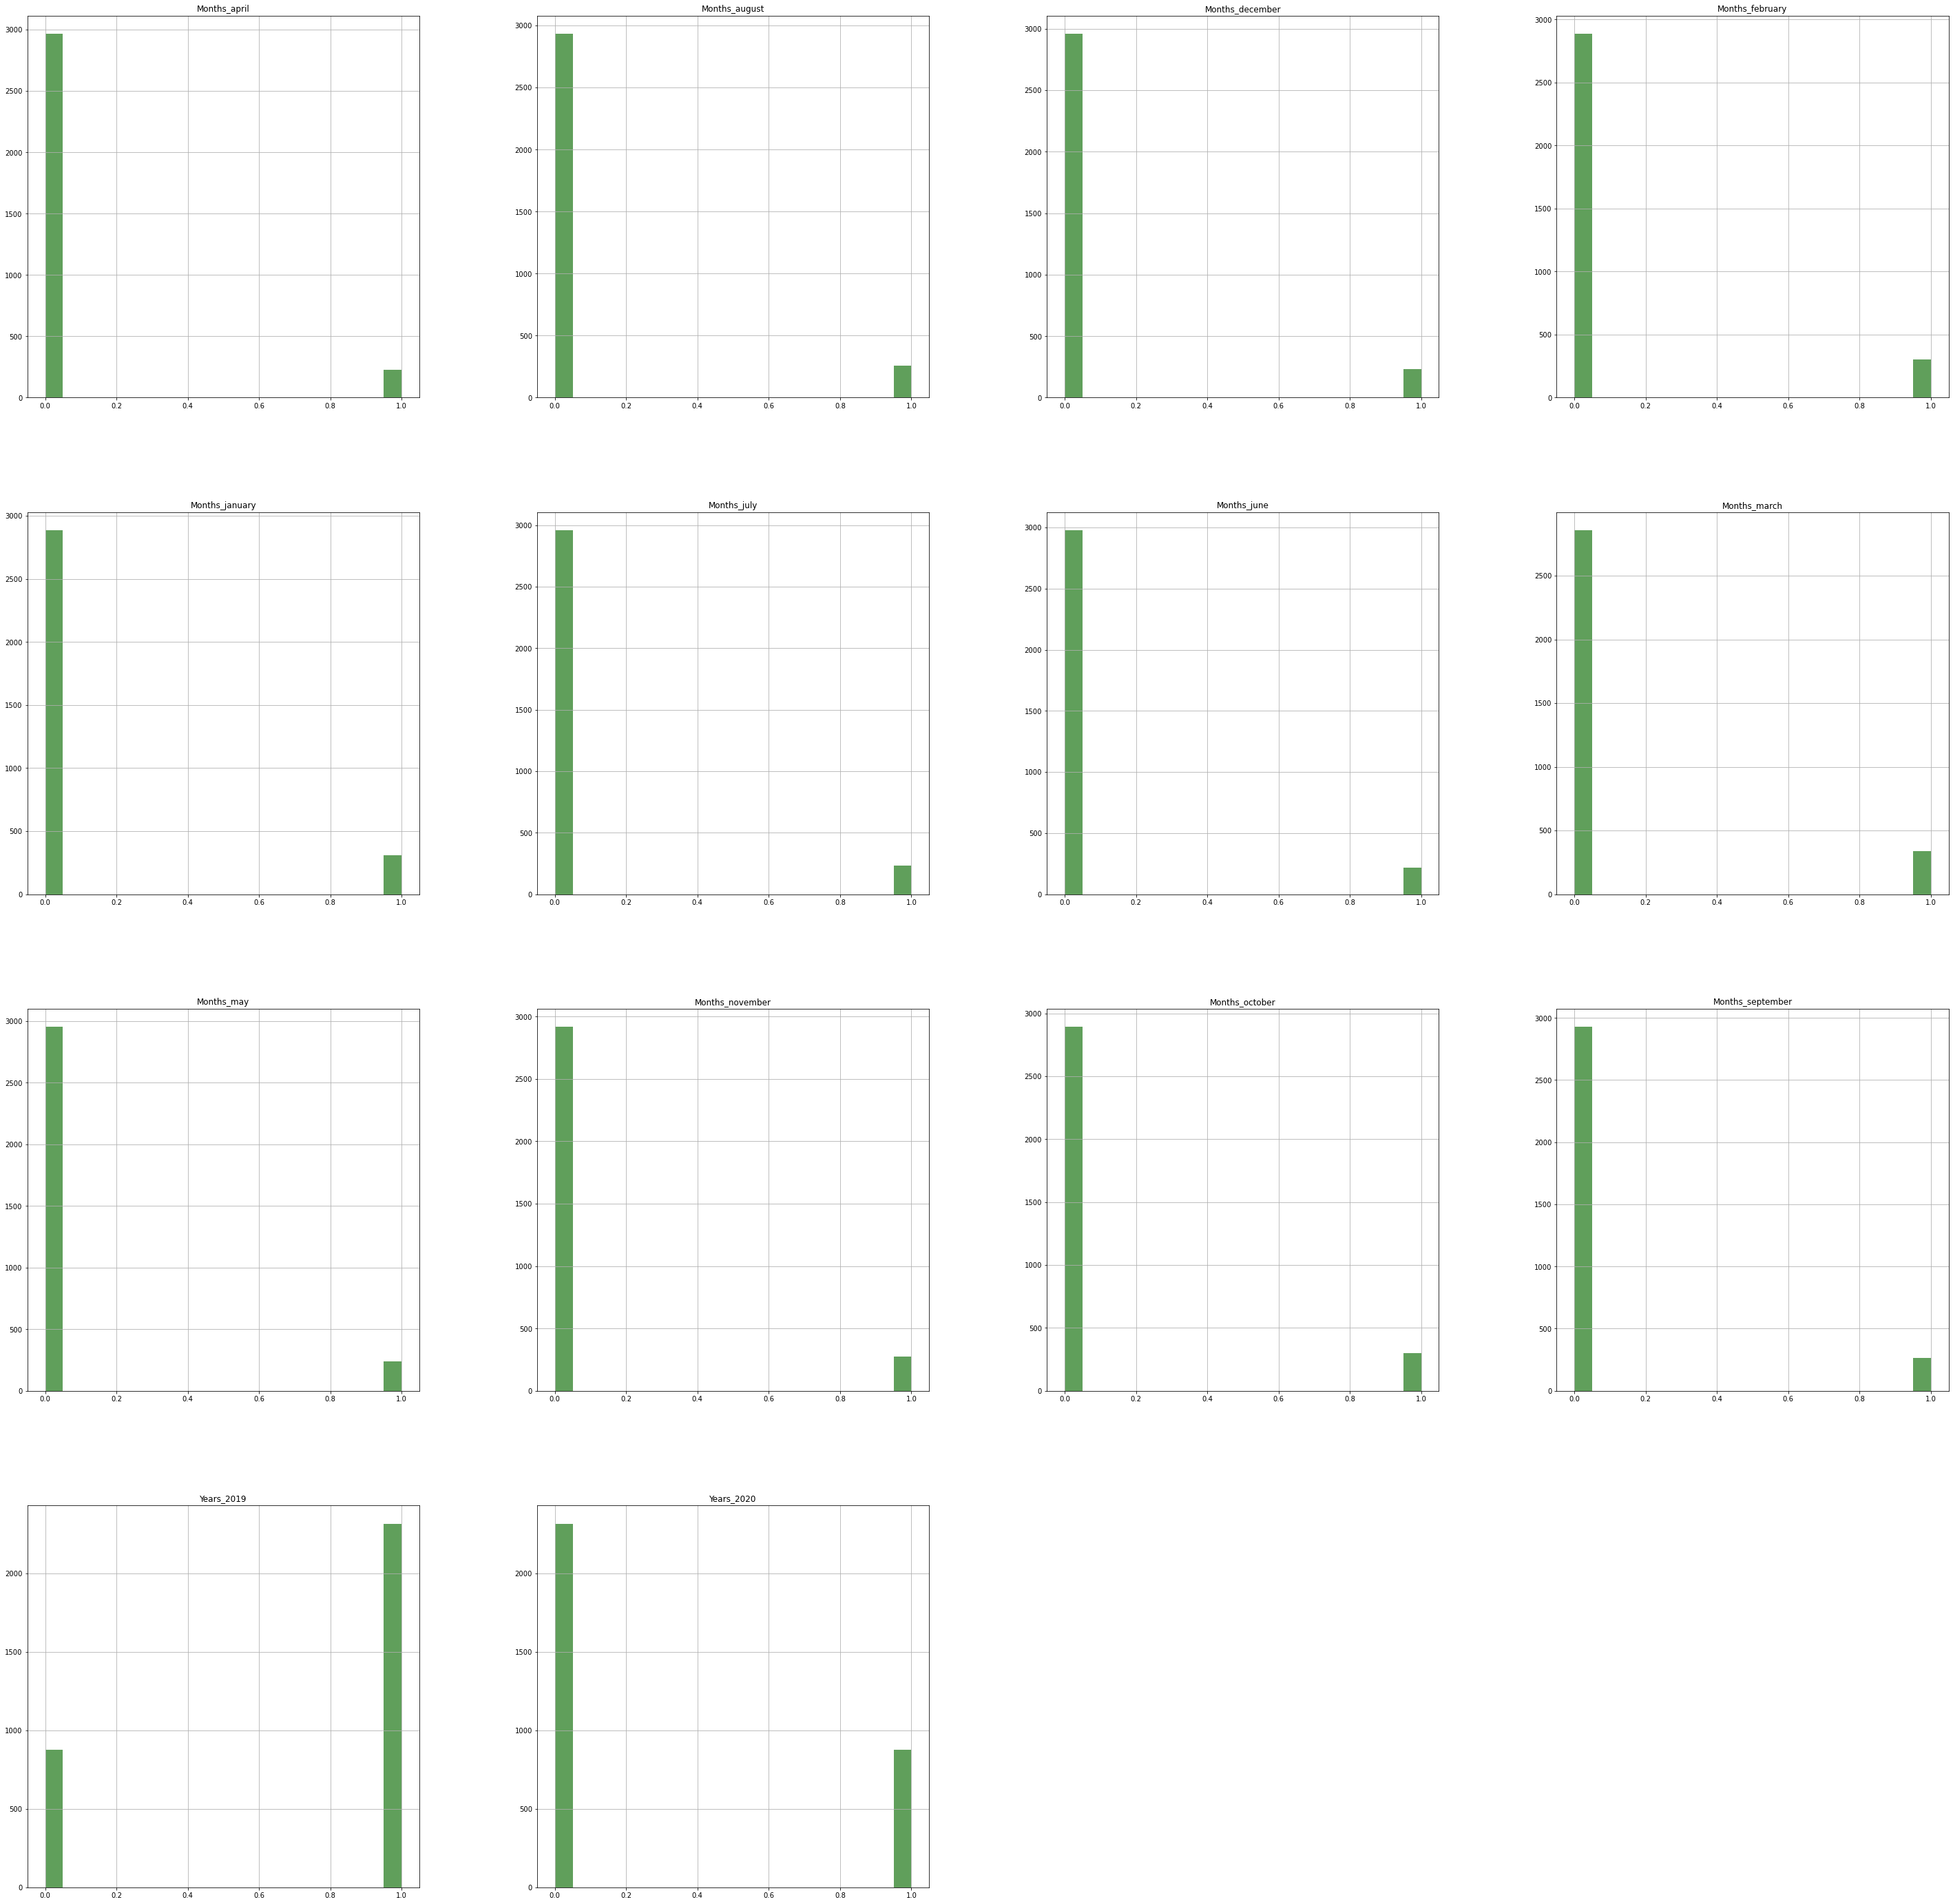

In [23]:
#Create histograms of all feature distributions
X.hist(figsize=(50,50),bins = 20, color="#107009AA")
plt.title("Gross")
plt.show()

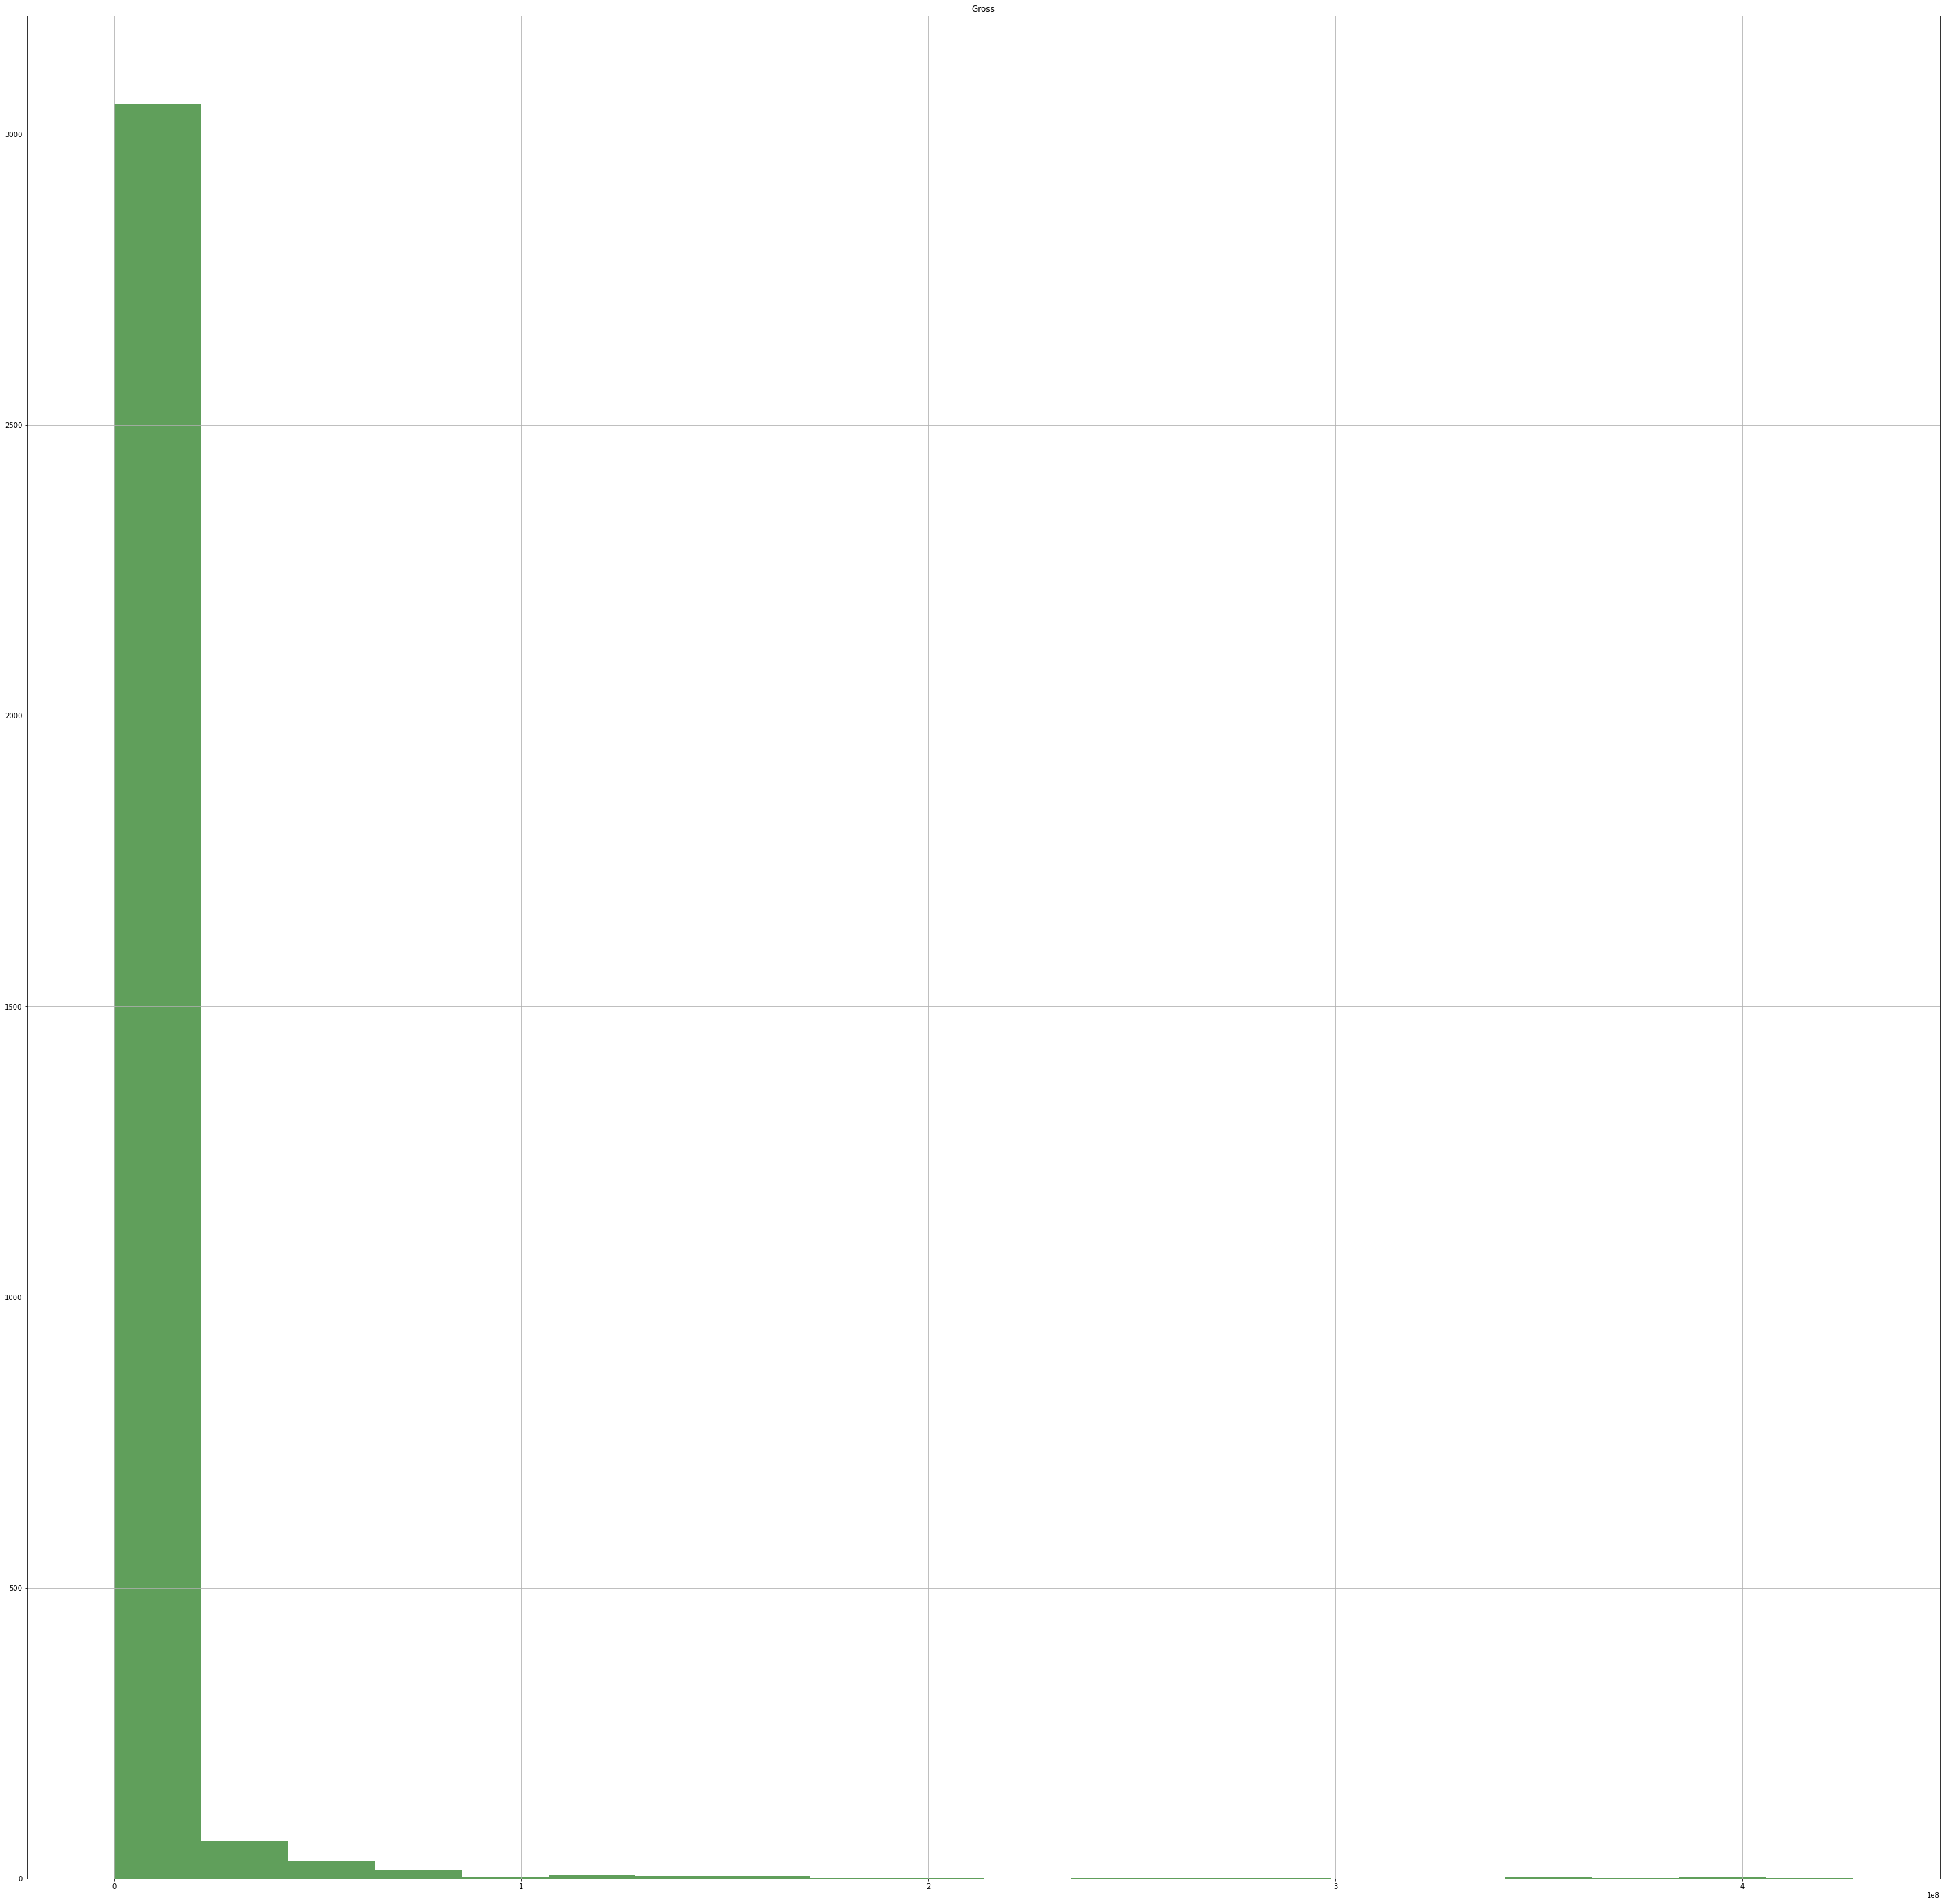

In [24]:
#Create feature distribution graph just for Gross
X['Gross'].hist(figsize=(50,50),bins = 20, color="#107009AA")
plt.title("Gross")
plt.show()

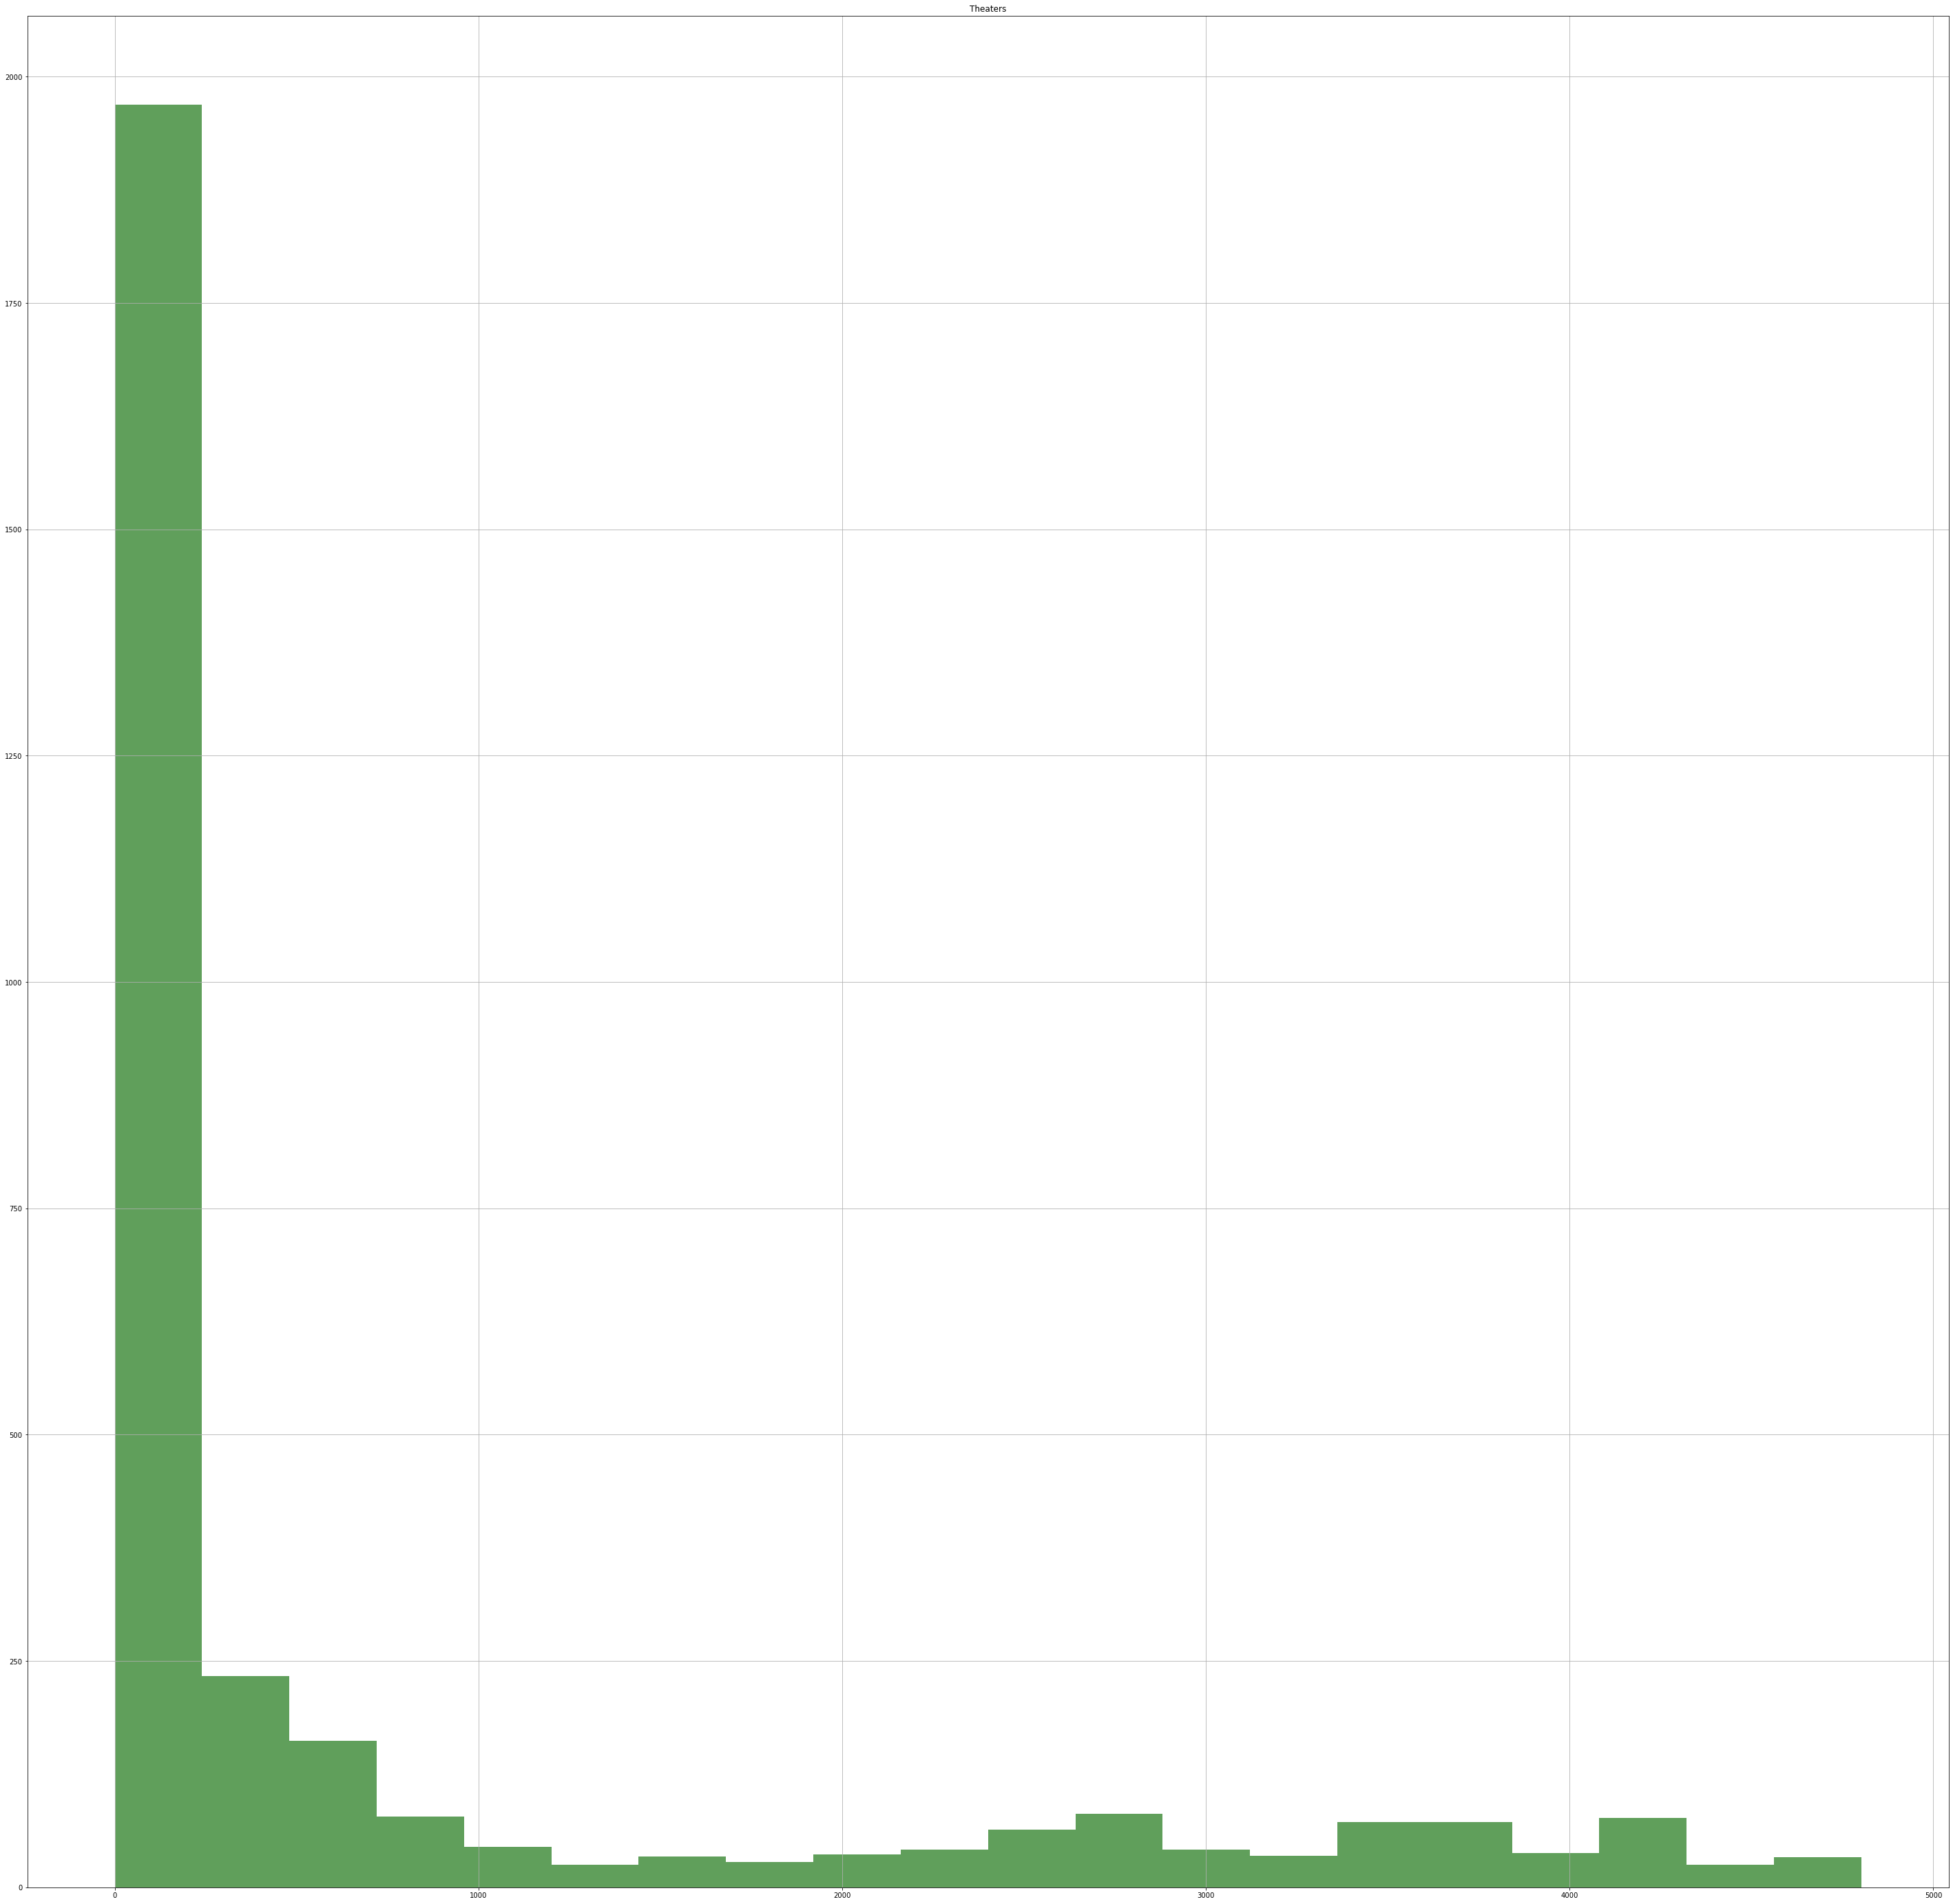

In [25]:
#Create feature distribution graph just for Theaters
X['Theaters'].hist(figsize=(50,50),bins = 20, color="#107009AA")
plt.title("Theaters")
plt.show()

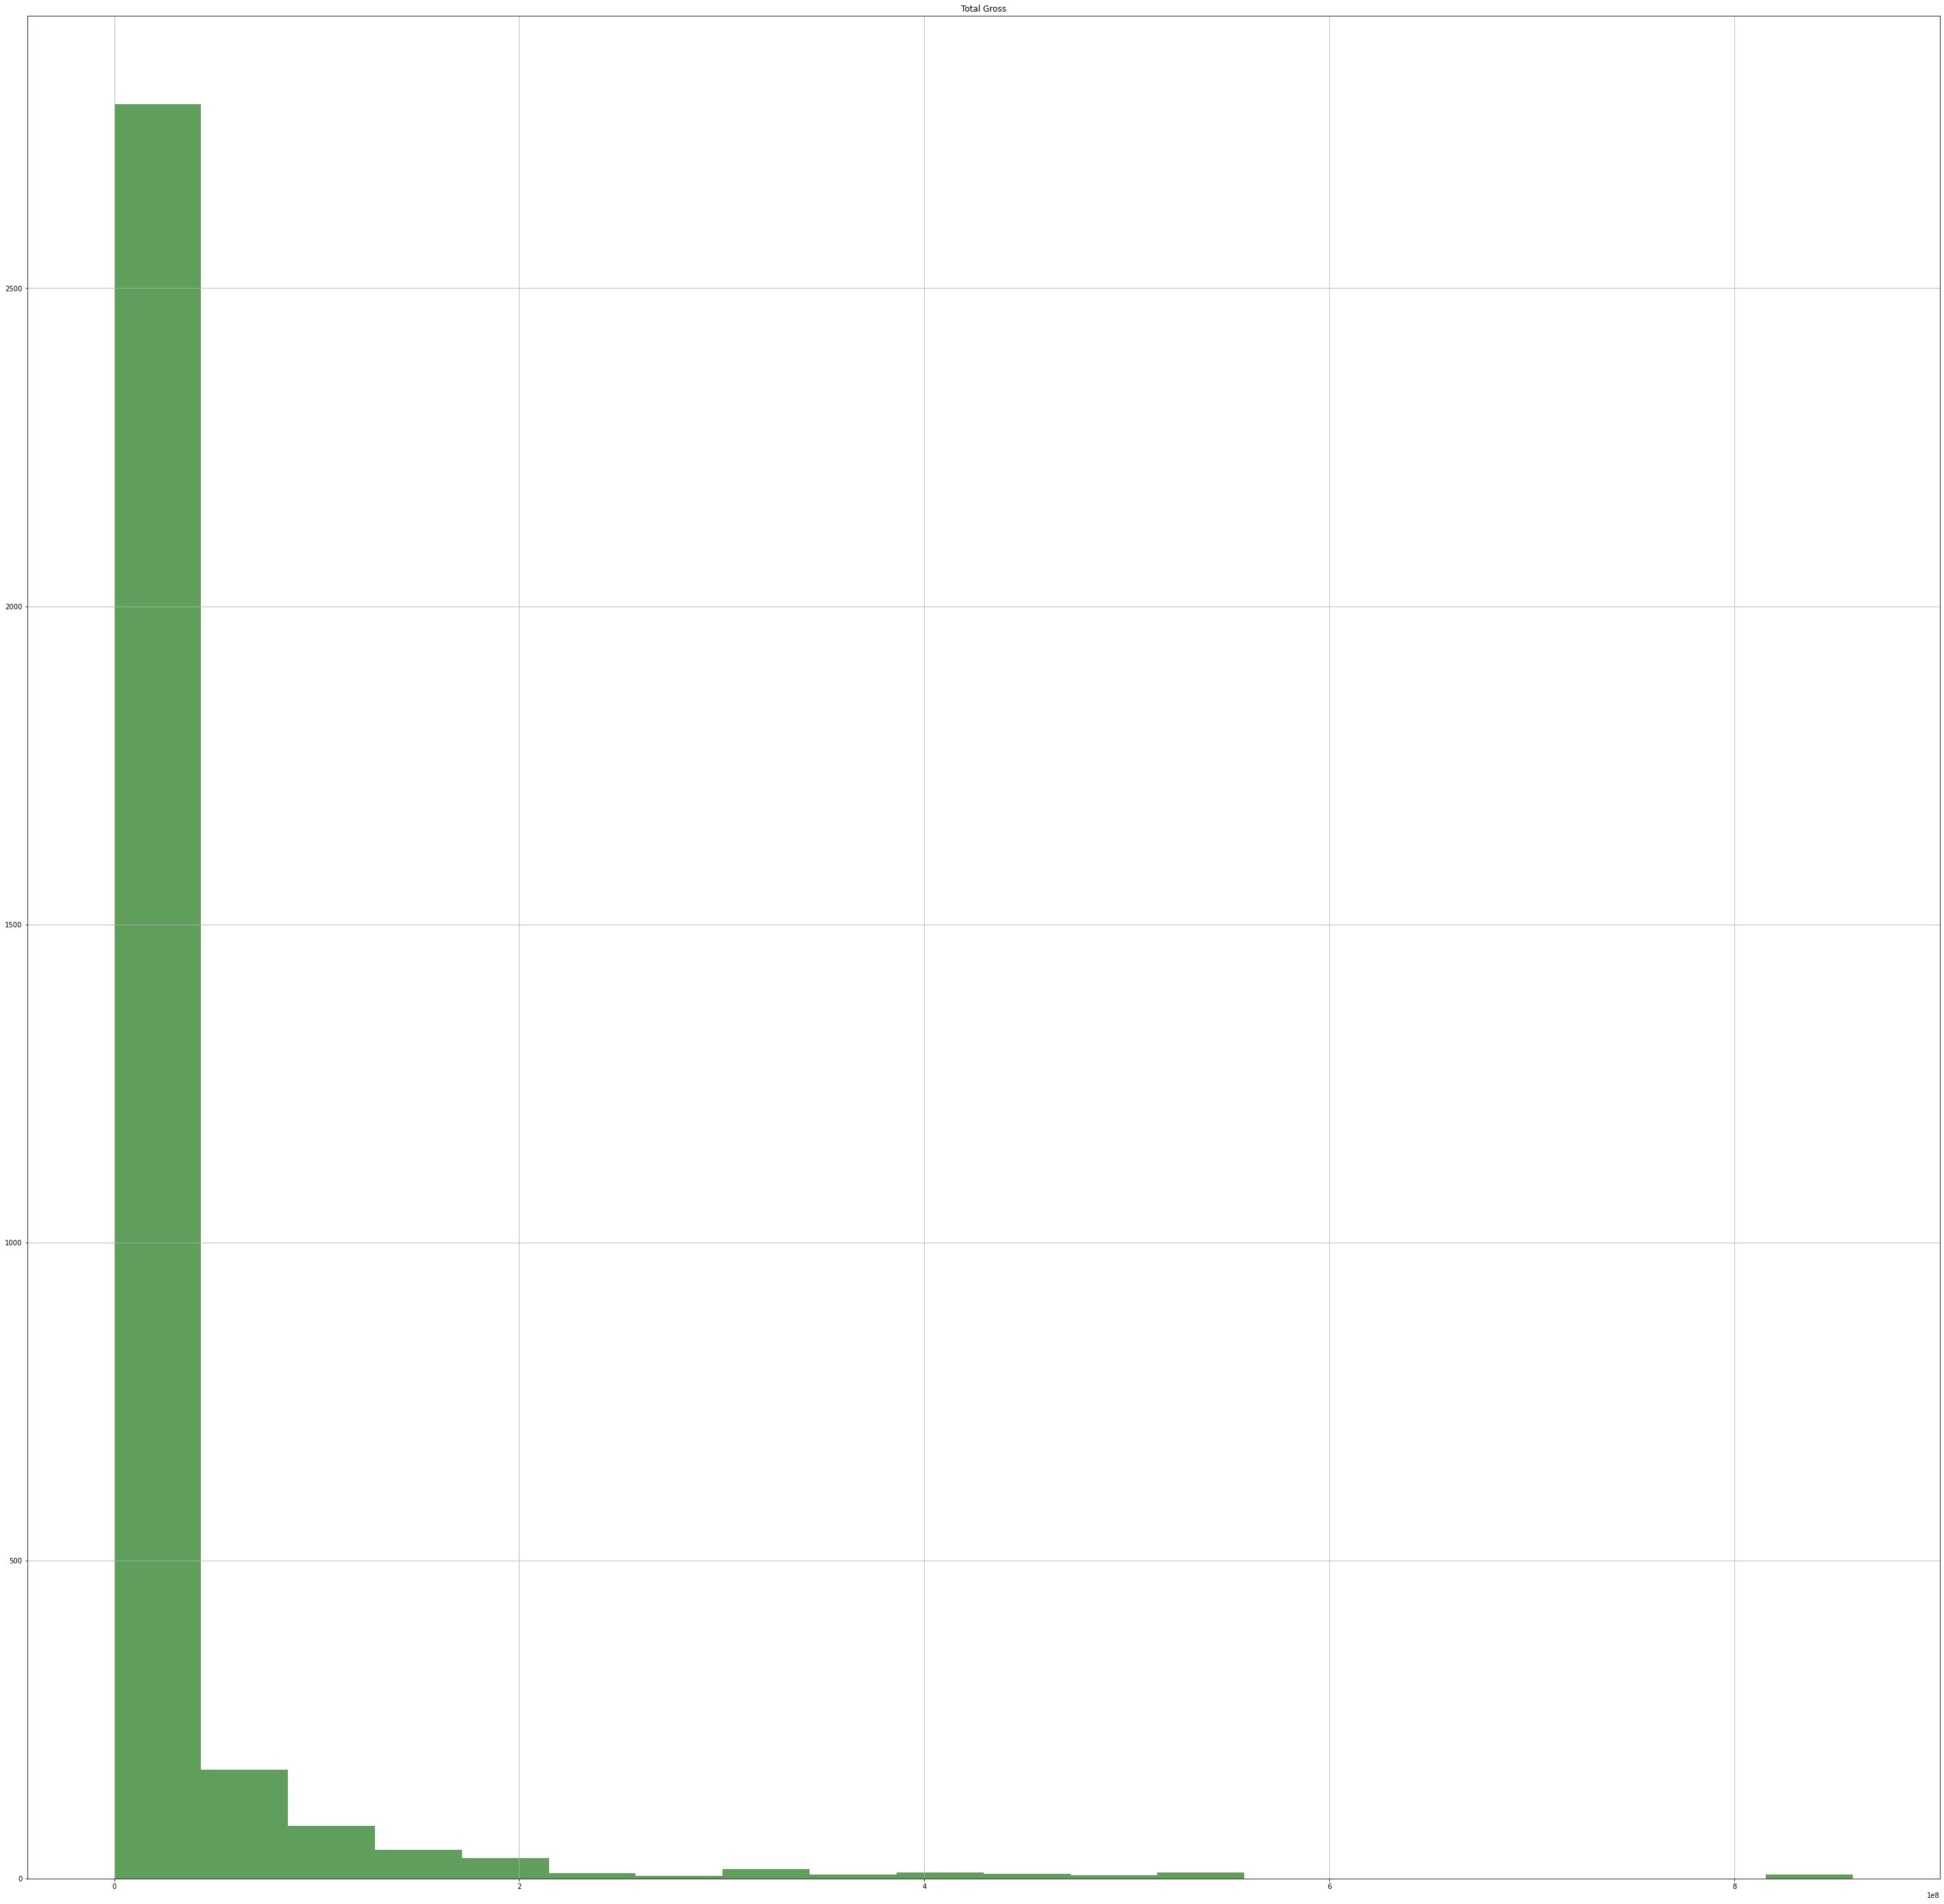

In [26]:
#Create feature distribution graph just for Total Gross
y.hist(figsize=(50,50),bins = 20, color="#107009AA")
plt.title("Total Gross")
plt.show()

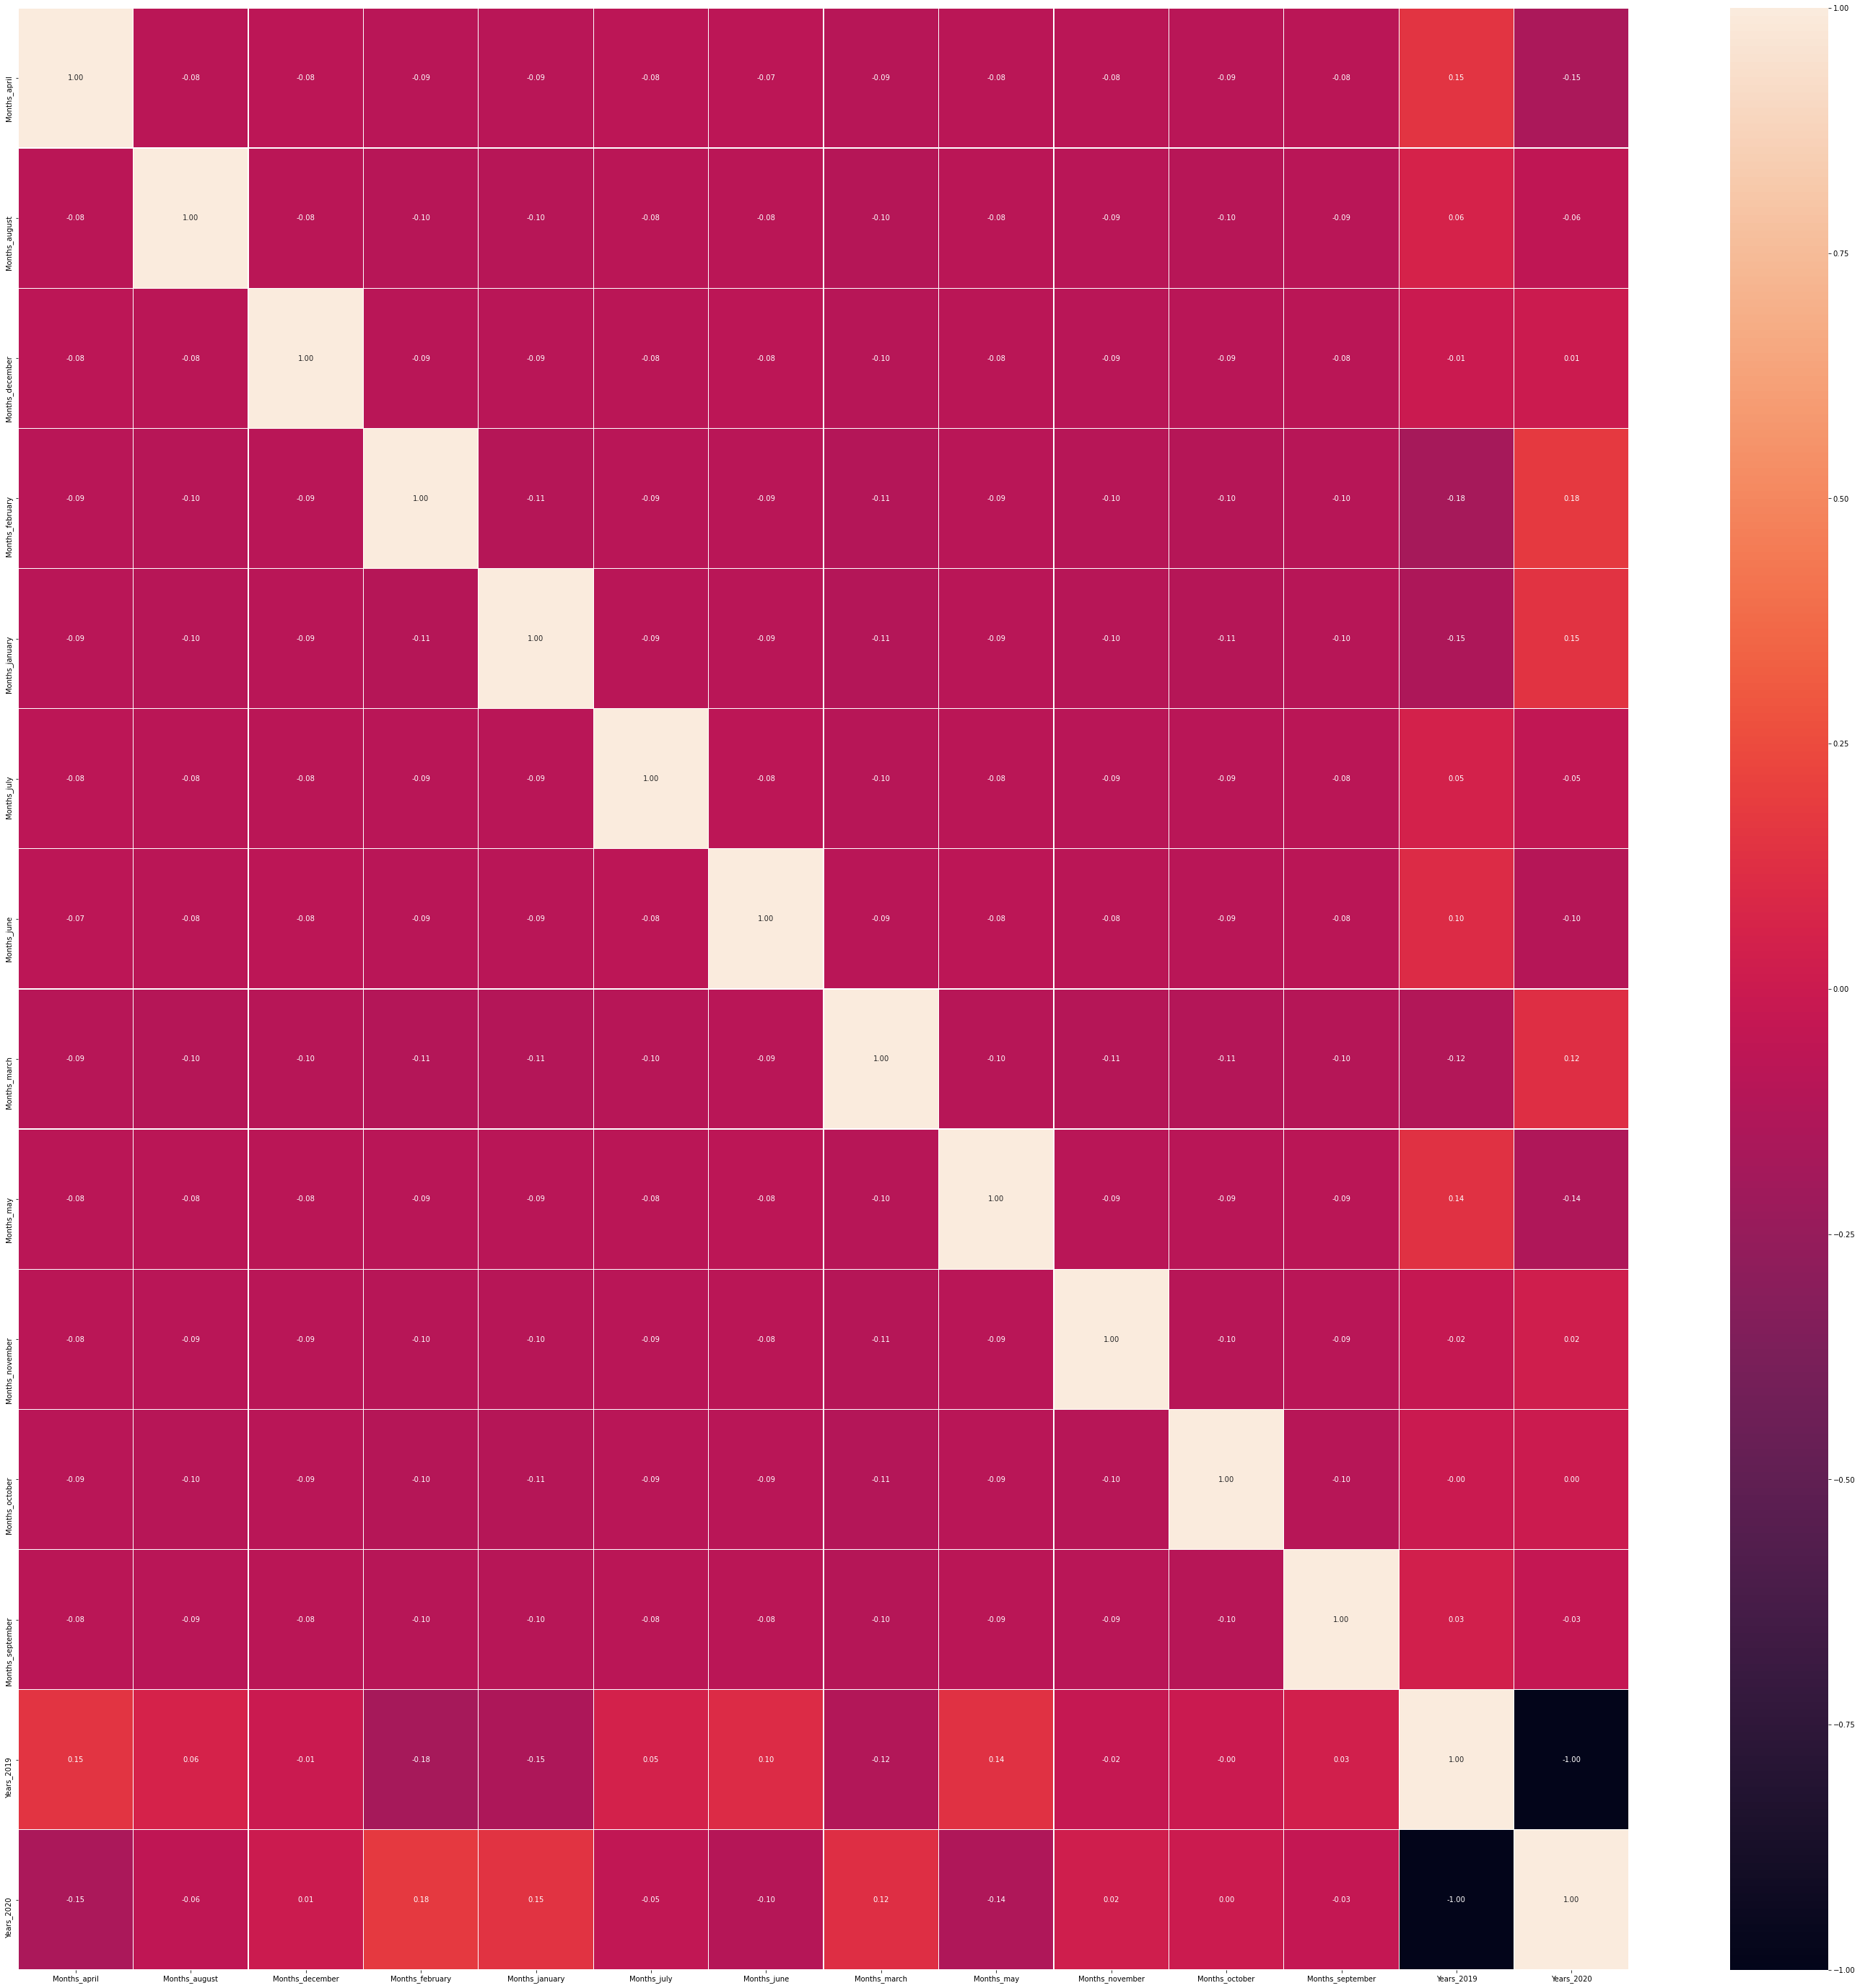

In [27]:
#Draw a heat map for feature distributions
plt.figure(figsize = (50,50))
sns.heatmap(data = X.corr(), annot=True, linewidths=.3, fmt="1.2f")
plt.show()

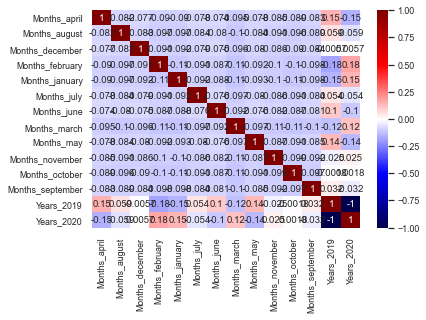

In [74]:
#Another example of a better corr matrix
sns.heatmap(X.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [75]:
# View the correlations
X.corr()

,Months_april,Months_august,Months_december,Months_february,Months_january,Months_july,Months_june,Months_march,Months_may,Months_november,Months_october,Months_september,Years_2019,Years_2020
Months_april,1.000000,-0.082056,-0.077486,-0.089752,-0.090077,-0.077665,-0.074207,-0.094713,-0.078379,-0.084615,-0.088936,-0.082915,0.153268,-0.153268
Months_august,-0.082056,1.000000,-0.083416,-0.096621,-0.096970,-0.083608,-0.079886,-0.101961,-0.084377,-0.091091,-0.095742,-0.089260,0.059214,-0.059214
Months_december,-0.077486,-0.083416,1.000000,-0.091239,-0.091569,-0.078952,-0.075437,-0.096282,-0.079677,-0.086017,-0.090410,-0.084289,-0.005695,0.005695
Months_february,-0.089752,-0.096621,-0.091239,1.000000,-0.106065,-0.091450,-0.087378,-0.111524,-0.092291,-0.099634,-0.104722,-0.097632,-0.177677,0.177677
Months_january,-0.090077,-0.096970,-0.091569,-0.106065,1.000000,-0.091781,-0.087695,-0.111928,-0.092625,-0.099995,-0.105101,-0.097986,-0.147266,0.147266
Months_july,-0.077665,-0.083608,-0.078952,-0.091450,-0.091781,1.000000,-0.075611,-0.096505,-0.079862,-0.086216,-0.090619,-0.084484,0.054339,-0.054339
Months_june,-0.074207,-0.079886,-0.075437,-0.087378,-0.087695,-0.075611,1.000000,-0.092208,-0.076306,-0.082378,-0.086584,-0.080722,0.103559,-0.103559
Months_march,-0.094713,-0.101961,-0.096282,-0.111524,-0.111928,-0.096505,-0.092208,1.000000,-0.097392,-0.105141,-0.110510,-0.103028,-0.118703,0.118703
Months_may,-0.078379,-0.084377,-0.079677,-0.092291,-0.092625,-0.079862,-0.076306,-0.097392,1.000000,-0.087009,-0.091452,-0.085260,0.139739,-0.139739
Months_november,-0.084615,-0.091091,-0.086017,-0.099634,-0.099995,-0.086216,-0.082378,-0.105141,-0.087009,1.000000,-0.098729,-0.092044,-0.024739,0.024739


In [78]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3191 entries, 0 to 3190
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gross             3191 non-null   object
 1   Theaters          3191 non-null   object
 2   Months_april      3191 non-null   uint8 
 3   Months_august     3191 non-null   uint8 
 4   Months_december   3191 non-null   uint8 
 5   Months_february   3191 non-null   uint8 
 6   Months_january    3191 non-null   uint8 
 7   Months_july       3191 non-null   uint8 
 8   Months_june       3191 non-null   uint8 
 9   Months_march      3191 non-null   uint8 
 10  Months_may        3191 non-null   uint8 
 11  Months_november   3191 non-null   uint8 
 12  Months_october    3191 non-null   uint8 
 13  Months_september  3191 non-null   uint8 
 14  Years_2019        3191 non-null   uint8 
 15  Years_2020        3191 non-null   uint8 
dtypes: object(2), uint8(14)
memory usage: 93.6+ KB


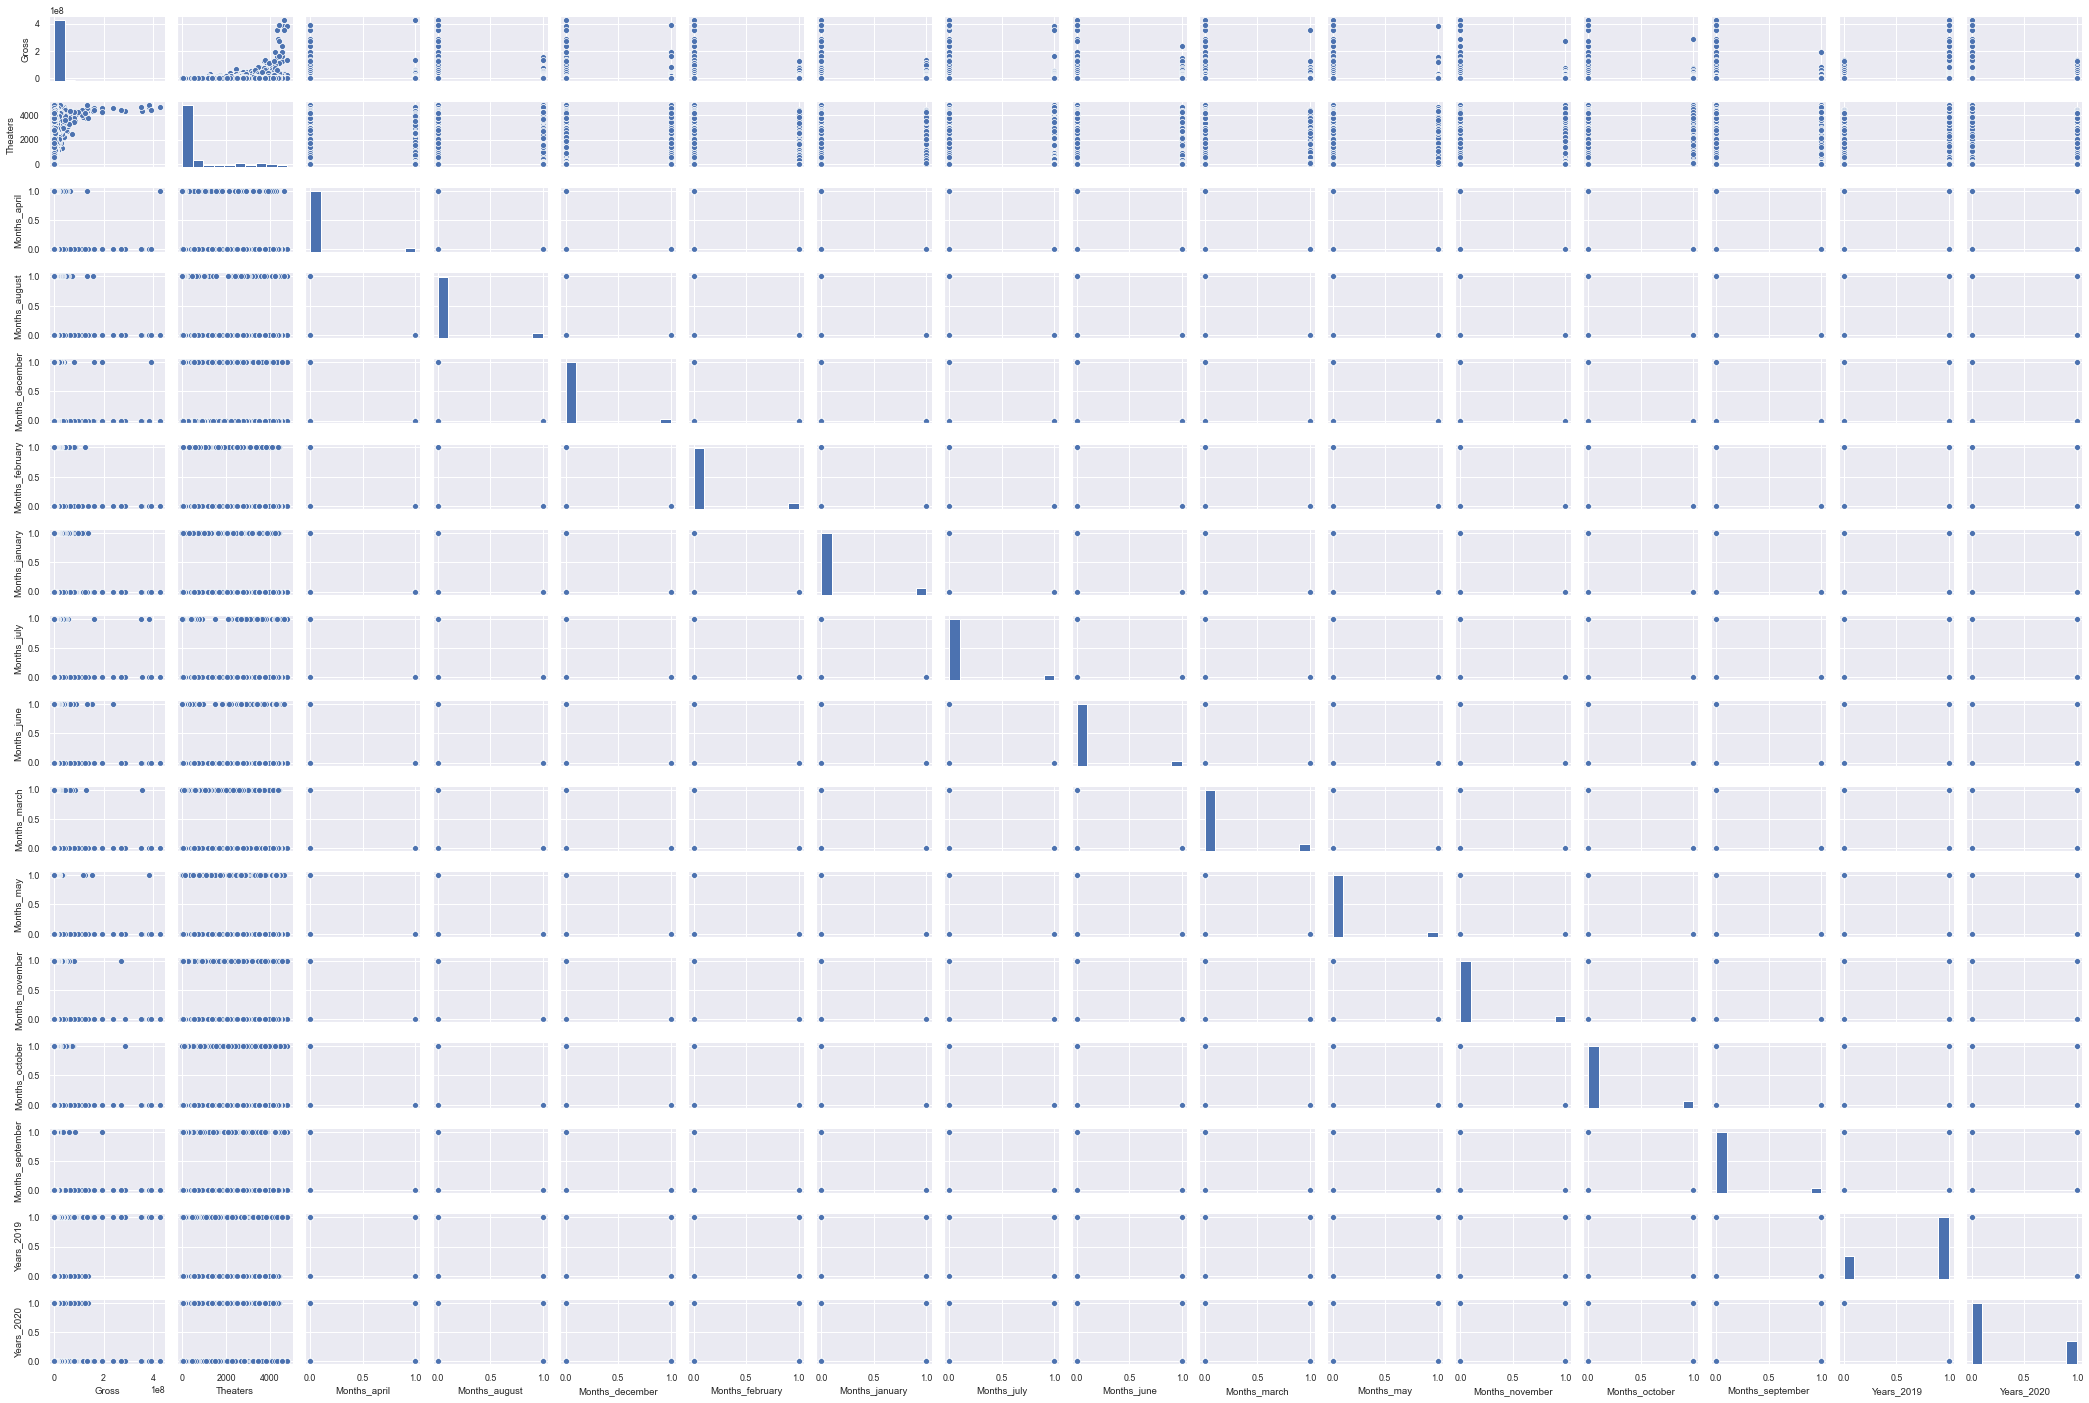

In [76]:
#Draw a pairplot of all the variable to variable relations as scatterplots
sns.pairplot(X, height=1.2, aspect=1.5);

#### Correlation Function

In [36]:
#This function will perform a correlation between input vectors and check to see if there is any relations between them

def correlation(dataset, threshold):
    """
    This function will perform a correlation 
    between input vectors and check to see if there 
    is any relations between them
    """
    col_corr = set() 
    corr_matrix = dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range (i):
            if (corr_matrix.iloc[i,j])> threshold:
                column =  corr_matrix.columns[i] 
                col_corr.add(column)
    return col_corr
corr_features = correlation(X, 0.8)
corr_features = set(corr_features)
for column in corr_features:
    del X [column]

#### Version 1: TEST-VAL-TRAIN SPLIT
###### *This section of code might need to be run outside of notebook
###### *It seems to mess up code blow it once it is run

In [ ]:
%pylab inline
#% config InlineBackend.figure_format = 'svg'

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [86]:
#Split the data 60 - 20 - 20 train/val/test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [87]:
X_train.columns

Index(['Gross', 'Theaters', 'Months_april', 'Months_august', 'Months_december',
       'Months_february', 'Months_january', 'Months_july', 'Months_june',
       'Months_march', 'Months_may', 'Months_november', 'Months_october',
       'Months_september', 'Years_2019', 'Years_2020'],
      dtype='object')

In [88]:
X_train.shape

(1914, 16)

In [89]:
X_val.shape

(638, 16)

In [90]:
X_test.shape

(639, 16)

In [ ]:
lasso_model = Lasso(alpha = 1000000)
lasso_model.fit(X_train.loc[:,X_train.columns], y_train)

In [117]:
list(zip(X_train.columns, lasso_model.coef_))

[('Gross', 1.0223928138889704),
 ('Theaters', 30182.39836992574),
 ('Months_april', 3823821.8376515703),
 ('Months_august', 4827778.961552109),
 ('Months_december', -5519543.147972001),
 ('Months_february', -322084.72346213204),
 ('Months_january', -2062942.0395195826),
 ('Months_july', 6301807.080629837),
 ('Months_june', 367673.1278506973),
 ('Months_march', 895340.4868220205),
 ('Months_may', -1805823.8099229618),
 ('Months_november', -1769041.533069785),
 ('Months_october', -2597390.9879438146),
 ('Months_september', 3695347.566792137),
 ('Years_2019', 3171720.5583540807),
 ('Years_2020', -0.0)]

#### Version 2: TEST-TRAIN SPLIT

In [ ]:
#Split the data into Training and Testing data sets, with percentage difference of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [39]:
#Standard Scaler for X_data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

(-0.2, 0.1)

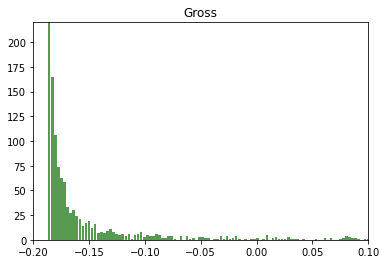

In [40]:
#Gross  
Gross = X_train[:, [0]]
n, bins, patches = plt.hist(x=Gross, bins='auto', color='#107009AA',alpha=0.7, rwidth=0.85)
plt.title('Gross')
plt.ylim(ymax=220)
plt.xlim(xmax=0.1,xmin=-0.2)

(-1.0, 1.0)

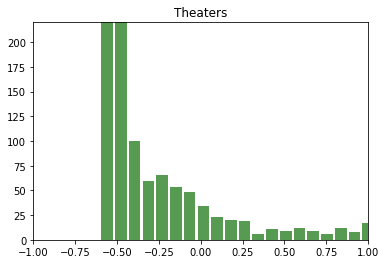

In [41]:
#Theaters 
Theaters = X_train[:, [1]]
n, bins, patches = plt.hist(x=Theaters, bins='auto', color='#107009AA',alpha=0.7, rwidth=0.85)
plt.title('Theaters')
plt.ylim(ymax=220)
plt.xlim(xmax=1,xmin=-1)

In [34]:
#Standard Scaler for Y_data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
y_train=y_train.values.reshape(-1, 1)
y_test=y_test.values.reshape(-1, 1)
y_train = sc.fit_transform(y_train)
y_test= sc.transform(y_test)

(-1.0, 1.0)

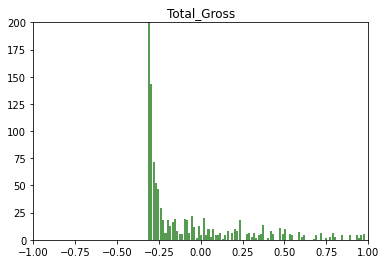

In [35]:
#Total Gross 
Total_Gross = y_train
n, bins, patches = plt.hist(x=Total_Gross, bins='auto', color='#107009AA', alpha=0.7, rwidth=0.85)
plt.title('Total_Gross')
plt.ylim(ymax=200)
plt.xlim(xmax=1,xmin=-1)

## REGRESSION MODELING

In [115]:
#Apply lienar regression to the dataset
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
#Find MAE/MSE/RMSE/r2 and plot them
from sklearn.metrics import r2_score
import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(y_test,y_pred)
print('mae value for linear regression is :',mae)
print('mse value for linear regression is :',mse)
print('rmse value for linear regression is :',rmse)
print('r2 value for linear regression is :',r2)

In [ ]:
#Plot Eval Metrics
Eval_Metrics = [mae, mse, rmse,r2 ]
Metric_Names = ['Mean Absolute Error', 'Mean Square Error', 'RMSE', 'R2Score']
Metrics_pos = np.arange(len(Metric_Names))
sns.set(font_scale=0.8)
plt.bar(Metrics_pos, Eval_Metrics)
plt.xticks(Metrics_pos, Metric_Names)
plt.title('Mean Absolute Error v Mean Square Error v RMSE v R2Score')
plt.show()

In [61]:
#Print y-intercept and coefficient
print('Linear Regression model intercept is:', regressor.intercept_)
print('Linear Regression model slope is:', regressor.coef_)

Linear Regression model intercept is: 21120006.955613334
Linear Regression model slope is: [ 2.08303742e+07  3.70475042e+07 -1.94448869e+20 -2.10146657e+20
 -2.02507736e+20 -2.26433132e+20 -2.26849427e+20 -2.00534322e+20
 -1.93930065e+20 -2.34544710e+20 -2.05418971e+20 -2.12912290e+20
 -2.30949349e+20 -2.12454926e+20  7.28469700e+05 -7.28469700e+05]


Text(0, 0.5, 'Residual')

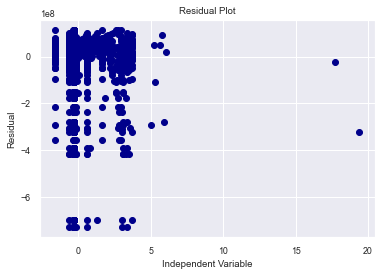

In [62]:
#Plot residuals
residuals = y_pred-y_test
plt.plot(X_test,residuals, 'o', color='darkblue')
plt.title("Residual Plot")
plt.xlabel("Independent Variable")
plt.ylabel("Residual")

In [63]:
#Apply Ridge Regression 
from sklearn.linear_model import Ridge

rr = Ridge(alpha=50)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_test)

In [ ]:
#Find MAE/MSE/RMSE/r2 and plot them
from sklearn.metrics import r2_score
import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(y_test, pred_train_rr)
mse = metrics.mean_squared_error(y_test, pred_train_rr)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(y_test,pred_train_rr)
print('mae value for ridge regression is :',mae)
print('mse value for ridge regression is :',mse)
print('rmse value for ridge regression is :',rmse)
print('r2 value for ridge regression is :',r2)

In [ ]:
#Plot Eval Metrics
Eval_Metrics = [mae, mse, rmse, r2]
Metric_Names = ['Mean Absolute Error', 'Mean Square Error', 'RMSE', 'R2Score']
Metrics_pos = np.arange(len(Metric_Names))
sns.set(font_scale=0.8)
plt.bar(Metrics_pos, Eval_Metrics)
plt.xticks(Metrics_pos, Metric_Names)
plt.title('Mean Absolute Error v Mean Square Error v RMSE v R2Score')
plt.show()

Text(0, 0.5, 'Residual')

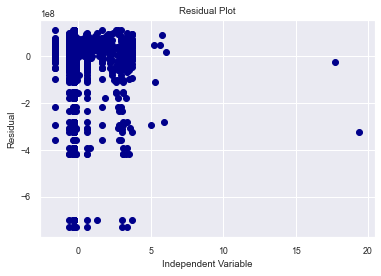

In [66]:
#Plot Residuals
residuals = pred_train_rr-y_test
plt.plot(X_test,residuals, 'o', color='darkblue')
plt.title("Residual Plot")
plt.xlabel("Independent Variable")
plt.ylabel("Residual")

In [107]:
#Apply Lasso Regression
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.001)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_test)

In [ ]:
#Find MAE/MSE/RMSE/r2 and plot them
from sklearn.metrics import r2_score
import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(pred_train_lasso, y_test)
mse = metrics.mean_squared_error(pred_train_lasso, y_test)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(y_test,pred_train_lasso)
print('mae value for lasso regression is :',mae)
print('mse value for lasso regression is :',mse)
print('rmse value for lasso regression is :',rmse)
print('r2 value for lasso regression is :',r2)

In [ ]:
#Plot Eval Metrics
Eval_Metrics = [mae, mse, rmse, r2]
Metric_Names = ['Mean Absolute Error', 'Mean Square Error', 'RMSE', 'R2Score']
Metrics_pos = np.arange(len(Metric_Names))
sns.set(font_scale=0.8)
plt.bar(Metrics_pos, Eval_Metrics)
plt.xticks(Metrics_pos, Metric_Names)
plt.title('Mean Absolute Error v Mean Square Error v RMSE v R2Score')
plt.show()

In [ ]:
#Plot Residuals
residuals = pred_train_lasso-y_test
plt.plot(X_test,residuals, 'o', color='darkblue')
plt.title("Residual Plot")
plt.xlabel("Independent Variable")
plt.ylabel("Residual")

In [ ]:
#Ridge Regression Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

lambdas = np.linspace(0.01,100,num=10)
scoresCV = []
for l in lambdas:
    RidgeReg = Ridge(alpha=l)
    RidgeReg.fit(X_train, y_train)    
    scoreCV = cross_val_score(RidgeReg, X_train, y_train, scoring='neg_mean_squared_error',
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
    scoresCV.append([l,-1*np.mean(scoreCV)])
len_score_CV=len(scoresCV)
counter=0
for x in range(0,len_score_CV):
    counter=counter+scoresCV[x][1]
print("The cross validation score will be :",counter/len_score_CV)